6990280


C:\Users\edwar\AppData\Local\Temp\ipykernel_34348\2238822273.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['stars'] = df_filtered['stars'].apply(lambda x: 1 if x >= 4.0 else 0)


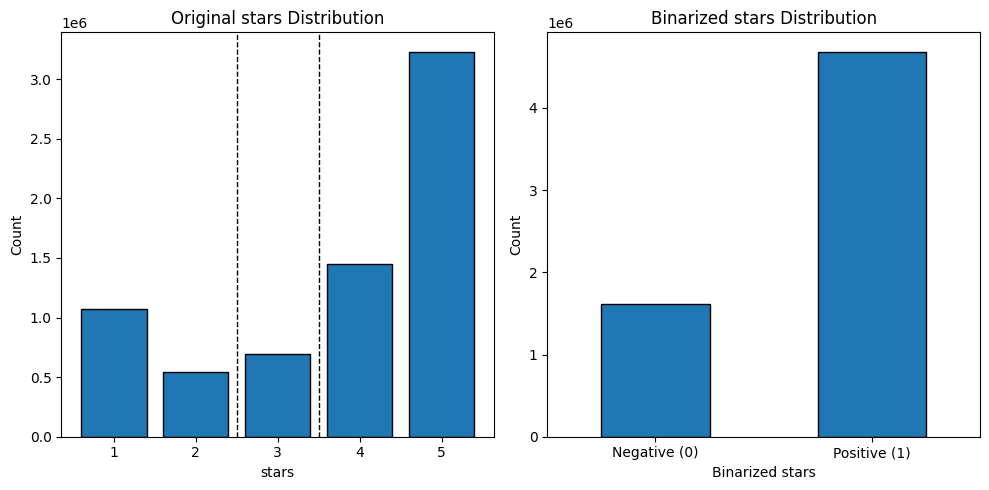

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("C:/Users/edwar/SocialPositivityData/YelpData/yelp.csv")
print(len(df))

plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
df['stars'].hist(bins=[0.5, 1.5, 2.5, 3.5, 4.5, 5.5], edgecolor='black', align='mid', rwidth=0.8)
plt.grid(False)
plt.xticks([1, 2, 3, 4, 5])  
plt.axvline(x=2.5, color='black', linestyle='dashed', linewidth=1) 
plt.axvline(x=3.5, color='black', linestyle='dashed', linewidth=1)  
plt.title('Original stars Distribution')
plt.xlabel('stars')
plt.ylabel('Count')

df_filtered = df[df['stars'] != 3.0]

df_filtered['stars'] = df_filtered['stars'].apply(lambda x: 1 if x >= 4.0 else 0)


plt.subplot(1, 2, 2)
df_filtered['stars'].value_counts().sort_index().plot(kind='bar', edgecolor='black')
plt.title('Binarized stars Distribution')
plt.xlabel('Binarized stars')
plt.ylabel('Count')
plt.xticks(ticks=[0, 1], labels=['Negative (0)', 'Positive (1)'], rotation=0)  
plt.tight_layout()
plt.show()

In [3]:
df = df_filtered
df = df.drop(columns=['review_id', 'useful', 'funny', 'cool'])
average_recommendation = df.groupby('business_id')['stars'].mean().reset_index()
average_recommendation.rename(columns={'stars': 'average_recommendation_score'}, inplace=True)

df = df.merge(average_recommendation, on='business_id', how='left')

In [4]:
review_count = df.groupby('business_id').size().reset_index(name='review_count')
df = df.merge(review_count, on='business_id', how='left')
df = df[df['review_count'] >= 9]

stars_variance = df.groupby('business_id')['stars'].var().reset_index(name='stars_variance')
df = df.merge(stars_variance, on='business_id', how='left')
df = df[df['stars_variance'] >= 0.05]


In [5]:
df_poor = df[df['average_recommendation_score'] < 0.5]
df_rich = df[df['average_recommendation_score'] >= 0.5]
print(len(df_poor))
print(len(df_rich))

762143
4626389


In [6]:
df_poor.to_csv('C:/Users/edwar/SocialPositivityData/YelpData/yelp_poor.csv', index=False)
df_rich.to_csv('C:/Users/edwar/SocialPositivityData/YelpData/yelp_rich.csv', index=False)

In [ ]:
df1 = pd.read_csv("C:/Users/edwar/SocialPositivityData/YelpData/yelp_poor.csv")
df2 = pd.read_csv("C:/Users/edwar/SocialPositivityData/YelpData/yelp_rich.csv")



# Shuffle the dataset randomly
df1 = df1.sample(frac=1, random_state=42).reset_index(drop=True)
df2 = df2.sample(frac=1, random_state=42).reset_index(drop=True)

df1.to_csv("C:/Users/edwar/SocialPositivityData/YelpData/yelp_poor.csv", index=False)
df2.to_csv("C:/Users/edwar/SocialPositivityData/YelpData/yelp_rich.csv", index=False)
